In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/3_Paragraph_classification')

# Import Toolkit

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Dataset

In [4]:
# Đường dẫn đến file txt
file_txt_path = "./news_categories/news_categories.txt"
with open(file_txt_path, 'r', encoding='utf-8') as file:
    content = file.read()

print(content[0:10000])

lines = content.strip().split('\n')
labels = []
sentences = []
for line in lines:
    label, sentence = line.split(' ', 1)
    labels.append(label)
    sentences.append(sentence)

__label__thể_thao sanchez không dự trận khai màn nh anh cùng arsenal bóng_đá anh zing vn tuyển_thủ chile không kịp hồi_phục thể_lực để cùng pháo thủ_thành london tham_dự trận đầu_tiên tại premier_league 2015 2016 diễn ra ngày 9 8 arsenal tới singapore liverpool đổ_bộ xuống thái_lan hai đội_bóng danh_tiếng tại giải ngoại_hạng_anh bắt_đầu có chuyến du_đấu châu á thầy_trò hlv brendan_rodgers có_mặt tại thái_lan chuẩn_bị cho trận_đấu diễn ra ngày 14 7 trả_lời phỏng_vấn trong chuyến du_đấu tại singapore hlv arsene_wenger xác_nhận tiền_đạo alexis_sanchez sẽ vắng_mặt trong trận khai màn premier_league theo chiến_lược gia người pháp cựu ngôi_sao barca cần được nghỉ_ngơi sau khi tham_dự copa_america trên quê_hương alexis sẽ trở_lại arsenal ngày 3 8 các cầu_thủ thường lấy lại thể_lực trong khoảng 3 tuần mới có_thể thi_đấu alexis có_thể nghỉ ít hơn tuy_nhiên anh ấy chắc_chắn không tham_dự trận_đấu đầu_tiên của mùa_giải mới trang bbc dẫn lại bài phỏng_vấn của hlv wenger ngoài trận xông đất premier

In [5]:
print("Labels:", labels[:5])
print("Sentences:", sentences[:5])

Labels: ['__label__thể_thao', '__label__âm_nhạc', '__label__nhịp_sống', '__label__công_nghệ', '__label__thể_thao']
Sentences: ['sanchez không dự trận khai màn nh anh cùng arsenal bóng_đá anh zing vn tuyển_thủ chile không kịp hồi_phục thể_lực để cùng pháo thủ_thành london tham_dự trận đầu_tiên tại premier_league 2015 2016 diễn ra ngày 9 8 arsenal tới singapore liverpool đổ_bộ xuống thái_lan hai đội_bóng danh_tiếng tại giải ngoại_hạng_anh bắt_đầu có chuyến du_đấu châu á thầy_trò hlv brendan_rodgers có_mặt tại thái_lan chuẩn_bị cho trận_đấu diễn ra ngày 14 7 trả_lời phỏng_vấn trong chuyến du_đấu tại singapore hlv arsene_wenger xác_nhận tiền_đạo alexis_sanchez sẽ vắng_mặt trong trận khai màn premier_league theo chiến_lược gia người pháp cựu ngôi_sao barca cần được nghỉ_ngơi sau khi tham_dự copa_america trên quê_hương alexis sẽ trở_lại arsenal ngày 3 8 các cầu_thủ thường lấy lại thể_lực trong khoảng 3 tuần mới có_thể thi_đấu alexis có_thể nghỉ ít hơn tuy_nhiên anh ấy chắc_chắn không tham_dự

In [6]:

train_sentences = []
test_sentences = []
train_labels = []
test_labels = []

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 7:3
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    sentences, labels, test_size=0.3, random_state=42
)

In [7]:
print(len(train_sentences))
print(len(train_labels))

32674
32674


In [8]:
# Thêm phần tử mới vào train_sentences và train_labels
# s = 'Nguyen Van Manh'
s = 'Nguyễn Văn Mạnh'
train_sentences.append(s)
l = 1
train_labels = np.append(train_labels, l)

print(train_sentences[-1])
print(train_labels[-1])

Nguyễn Văn Mạnh
1


In [9]:
print(len(train_sentences))
print(len(train_labels))
print(train_sentences[0])
print(train_labels[0])
print(train_labels) # label chỉ có 2 nhãn : 0 và 1

32675
32675
thổ_nhĩ_kỳ không kích 20 mục_tiêu ở iraq thế_giới zing vn hãng tin tư_nhân dogan hôm_qua đưa tin máy_bay chiến_đấu của thổ_nhĩ_kỳ đêm 31 12 đã dội bom hơn 20 mục_tiêu của đảng công_nhân người_kurd pkk ở miền bắc_iraq thổ_nhĩ_kỳ không kích 20 mục_tiêu ở iraq hãng tin tư_nhân dogan hôm_qua đưa tin máy_bay chiến_đấu của thổ_nhĩ_kỳ đêm 31 12 đã dội bom hơn 20 mục_tiêu của đảng công_nhân người_kurd pkk ở miền bắc_iraq ảnh minh_họa tin cho hay 8 chiến_đấu cơ f 16 của thổ_nhĩ_kỳ đã oanh kích các mục_tiêu trên sau khi một máy_bay_không_người_lái của quân_đội nước này phát_hiện một_số nhóm pkk đang di_chuyển ở các khu_vực zap avasin và baysan thuộc miền bắc_iraq cuộc tấn_công diễn ra trong hai giờ đồng_hồ và trong số các mục_tiêu bị phá_hủy có các khẩu đội phòng_không cũng như những nơi ẩn_náu được phiến quân pkk lập nên trong điều_kiện mùa_đông trong diễn_biến liên_quan ông yalcin_akdogan cố_vấn chính_trị của thủ_tướng thổ_nhĩ_kỳ cho_biết các quan_chức tình_báo nước này đã tiến_hàn

In [10]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Parameters

In [11]:
vocab_size = 10000
embedding = 64
max_length = 256
embedding_dim = 128  # Kích thước vector nhúng
units = 128

## Tokenizer

In [12]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Thử nghiệm với các giá trị khác nhau của vocab_size
# vocab_sizes = [5000, 10000, 20000]

# for vocab_size in vocab_sizes:
#     tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
#     tokenizer.fit_on_texts(train_sentences)

#     # Chuyển đổi các câu thành các chuỗi số
#     train_sequences = tokenizer.texts_to_sequences(train_sentences)

#     # Đệm các chuỗi để có độ dài bằng nhau
#     padded_sequences = pad_sequences(train_sequences, maxlen=100, padding='post')

#     print(f"Vocabulary Size: {vocab_size}")
#     print(f"Example of padded sequences: {padded_sequences[:2]}")
#     print(f"Number of unique tokens: {len(tokenizer.word_index)}")
#     print("-" * 50)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer (num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts (train_sentences + test_sentences + ['Nguyễn Văn Mạnh'])

In [14]:
train_sentences_seq = tokenizer.texts_to_sequences(train_sentences)
padded_train_sentences = pad_sequences (train_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [15]:
word_index = tokenizer.word_index
len(tokenizer.word_index)

93363

In [16]:
print(word_index['romance'])
print(word_index['nguyen'])
print(word_index['van'])
# đầu vào là 'Nguyễn Văn Mạnh'
print(word_index['nguyễn'])
print(word_index['văn'])
print(word_index['mạnh']) # sẽ chuyển thành in thường hết

9370
4155
1815
250
144
327


In [17]:
# Từ index lấy ra word
reverse_word_index = {index: word for word, index in word_index.items()}
print(reverse_word_index[900])
print(reverse_word_index[28201])
print(reverse_word_index[1090])
print(reverse_word_index[65341])
print(reverse_word_index[65342])
print(reverse_word_index[65343])

thẳng
umno
truy
jabbar
shabbut
adalah


In [18]:
test_sentences_seq = tokenizer.texts_to_sequences (test_sentences)
padded_test_sentences = pad_sequences(test_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [19]:
print(len(test_sentences[0]))
print(test_sentences[0])

4627
thư_an_nguy gửi toàn_shinoda chỉ có trái_tim muốn vỡ tung sống trẻ zing vn trưa hôm_nay ngày 24 8 an_nguy lần đầu_tiên viết những dòng tâm_sự cảm_xúc về toàn_shinoda sau sự ra đi đột_ngột của anh ngày 27 7 an_nguy lập_tức quay về việt_nam sau khi qua mỹ được vài ngày để dự tang_lễ của toàn_shinoda trước sự ra đi đột_ngột của bạn_trai an_nguy hoàn_toàn suy_sụp sau đó cô chưa lần nào tâm_sự sự mất_mát lớn này cho đến thời_điểm hiện_tại sau gần một tháng toàn_shinoda mất an_nguy bộc_bạch về những cảm_xúc vui buồn tức_giận đau_khổ người_thân lặng nhìn toàn_shinoda trước giờ hỏa_táng trưa 27 7 linh_cữu vlogger toàn_shinoda đã được di_chuyển đến đài_hóa_thân hoàn_vũ_văn_điển hà_nội hơn 16h lễ hỏa_táng kết_thúc trong sự đau_thương lời tâm_sự của an_nguy mới đăng_tải được 30 phút đã thu_hút hơn 80 000 lượt like thích cùng sự ủng_hộ đồng_cảm của cộng_đồng mạng an_nguy viết anh này những ngày qua em đã rất giận anh em đã nghĩ sẽ giận anh cả đời này sẽ chẳng bao_giờ tha_thứ cho anh nhưng em 

In [20]:
padded_test_sentences

array([[ 570,  195,  769, ...,   28,  164,  312],
       [ 118,  152,    3, ...,  652,  273,  571],
       [3598, 1348,   32, ...,   39,   18,    2],
       ...,
       [5485, 1416,  269, ..., 2859,   63, 5485],
       [4057, 3122,   19, ..., 4359, 4359,  688],
       [  18,  359,  600, ...,   43,   16,   43]], dtype=int32)

In [21]:
padded_test_sentences.shape

(14004, 256)

In [22]:
print(len(padded_test_sentences[0]))

256


## Label Encoder

In [23]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [24]:
num_classes = len(np.unique(train_labels_encoded))
num_classes

19

In [25]:
# Chuyển nhãn sang dạng one-hot encoding
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)

In [26]:
len(label_encoder.classes_)

19

# Model

## Model1

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Flatten
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length = max_length)) # embedding ở đây chính là output_dim
model1.add(Flatten())
# model.add(LSTM(embedding)) # embedding node ẩn ???
model1.add(Dense(128, activation='relu'))
model1.add(Dense(19, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dense_1 (Dense)             (None, 19)                2451      
                                                                 
Total params: 5476883 (20.89 MB)
Trainable params: 5476883 (20.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## RNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

rnn_model  = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
rnn_model.add(SimpleRNN(units))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(19, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 19)                2451      
                                                                 
Total params: 1331859 (5.08 MB)
Trainable params: 1331859 (5.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## LSTM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
lstm_model.add(LSTM(units))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(19, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 19)                2451      
                                                                 
Total params: 1430547 (5.46 MB)
Trainable params: 1430547 (5.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# # Callbacks
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# checkpoint = ModelCheckpoint('./Phuc_Save_Model/LSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# # Fit the model
# H = lstm_model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128,
#                             validation_data=(padded_test_sentences, test_labels),
#                             callbacks=[early_stopping, checkpoint])

# # Accessing training history
# print("Training History:", H.history)

In [31]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [32]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=128))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [33]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense

# model = Sequential()
# model.add(Embedding(vocab_size, embedding, input_length=max_length))
# model.add(LSTM(64))  # LSTM layer with 64 units
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

## BiLSTM

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Create BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
bilstm_model.add(Bidirectional(LSTM(256)))

bilstm_model.add(Dense(128, activation='relu'))
bilstm_model.add(Dense(19, activation='softmax'))

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 512)               788480    
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 19)                2451      
                                                                 
Total params: 2136595 (8.15 MB)
Trainable params: 2136595 (8.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training

In [35]:
# model = model1
# model = rnn_model
# model = lstm_model
model = bilstm_model

In [36]:
print(padded_train_sentences.shape)
print(padded_test_sentences.shape)
print(train_labels_one_hot.shape)
print(test_labels_one_hot.shape)

(32675, 256)
(14004, 256)
(32675, 19)
(14004, 19)


In [37]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Manh_Save/BiLSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = model.fit(padded_train_sentences, train_labels_one_hot, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels_one_hot),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.6809
Epoch 1: val_loss improved from inf to 0.05120, saving model to ./Manh_Save/BiLSTM_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - 44s 148ms/step - loss: 1.0453 - accuracy: 0.6809 - val_loss: 0.0512 - val_accuracy: 0.9871
Epoch 2/10
256/256 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9953
Epoch 2: val_loss improved from 0.05120 to 0.01375, saving model to ./Manh_Save/BiLSTM_model.h5
256/256 [==============================] - 23s 89ms/step - loss: 0.0209 - accuracy: 0.9953 - val_loss: 0.0137 - val_accuracy: 0.9979
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9986
Epoch 3: val_loss improved from 0.01375 to 0.00716, saving model to ./Manh_Save/BiLSTM_model.h5
256/256 [==============================] - 24s 94ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0072 - val_accuracy: 0.9981
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994
Epoch 4: val_loss improved from 0.00716 to 0.00586, saving model to ./Manh_Save/BiLSTM_model.h5
256/256 [===============

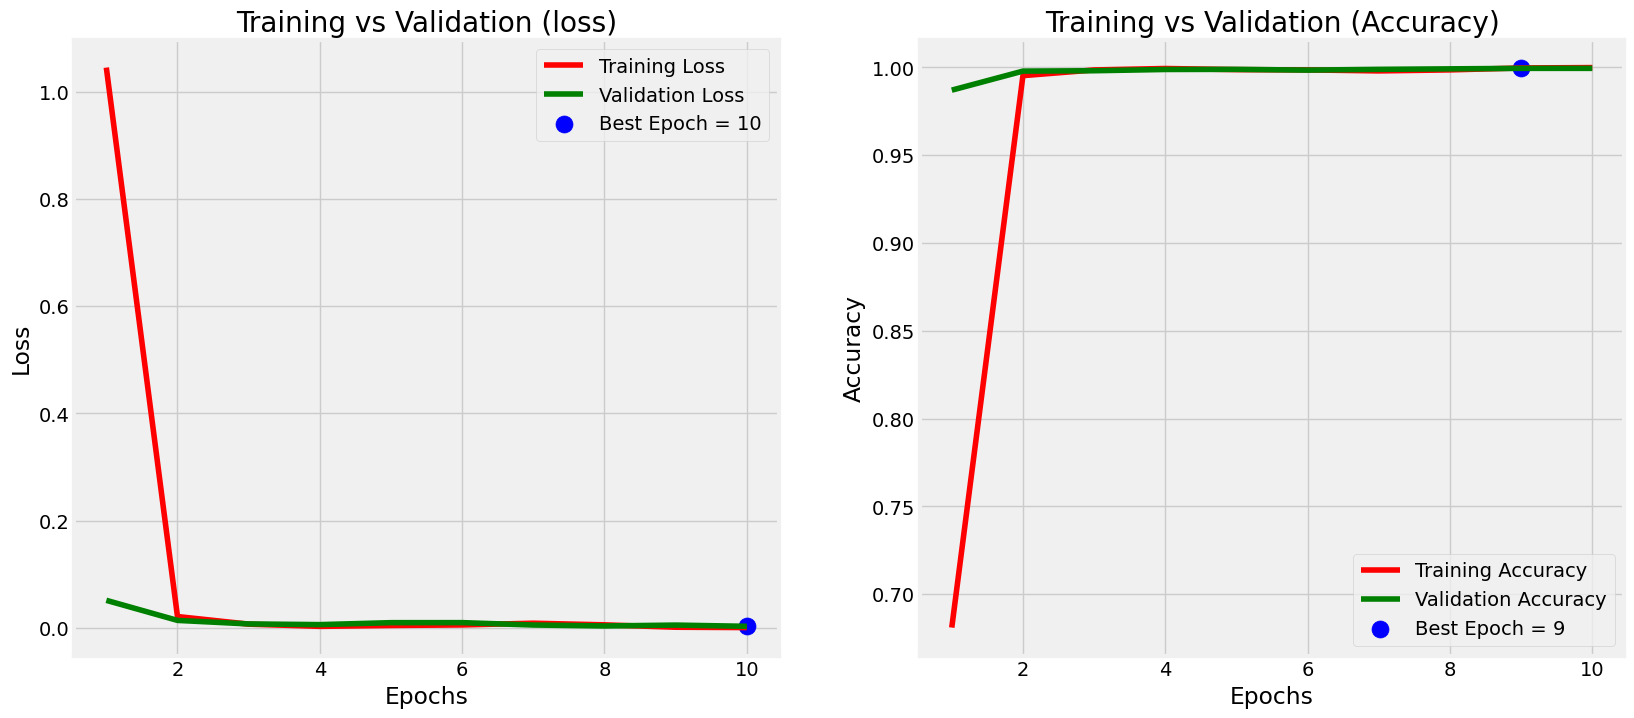

In [38]:
train_acc = H.history['accuracy']
train_loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Test

In [39]:
test_sen = ['Nguyễn Văn Mạnh']
test_sen = ['hà_nội t t chốt danh_sách dự afc cup thể_thao việt_nam zing vn tiền_vệ có lối chơi sáng_tạo bậc nhất của hà_nội t t benicio được hlv']
test_seq = tokenizer.texts_to_sequences (test_sen)
padded_test_seq=pad_sequences(test_seq, maxlen = max_length, truncating='post', padding='post')
# padded_test_seq

print(padded_test_seq.shape)

import numpy as np
# Dự đoán nhãn cho tập kiểm tra
predicted_prob = model.predict(padded_test_seq)
# Chuyển đổi nhãn dự đoán từ one-hot encoding về dạng số
predicted_labels_encoded = np.argmax(predicted_prob, axis=1)
# Chuyển đổi nhãn từ dạng số về dạng chuỗi
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)
# In ra một số nhãn dự đoán
print("Predicted labels (first 10):", predicted_labels[:10])

(1, 256)
1/1 [==============================] - 1s 715ms/step
Predicted labels (first 10): ['__label__thể_thao']


## WEIGHT

In [40]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (10000, 64) thì 64 chính là embeding

(10000, 128)

In [41]:
# Tìm trọng số của một từ cụ thể trong từ điển
position = tokenizer.texts_to_sequences (['Mạnh'])
weights[position]

array([[[ 0.01208341, -0.02504387,  0.0443177 ,  0.02086137,
         -0.07977523,  0.02100705, -0.00695282,  0.02603182,
          0.03625925, -0.06102298, -0.01925939, -0.01096897,
         -0.00195584,  0.00191045,  0.06714852, -0.00452411,
          0.01685623,  0.09491103,  0.06422731, -0.01205335,
         -0.05584795,  0.03074192, -0.04136482, -0.04982754,
         -0.01664355,  0.04241565, -0.03191778,  0.0221731 ,
         -0.00217402,  0.00968546,  0.07086711, -0.0441655 ,
          0.05463566,  0.01803027,  0.01523951, -0.00466853,
          0.04356132, -0.00238613,  0.03680725, -0.04041416,
         -0.04193907,  0.04768413, -0.01724653, -0.03780265,
          0.02839822,  0.04647017, -0.04626536, -0.08615533,
         -0.04185898, -0.00352694,  0.04327873, -0.08005114,
          0.07645591, -0.06802137, -0.0146894 ,  0.01318209,
          0.03045346, -0.02973809, -0.01462959,  0.05225817,
         -0.02556089,  0.04509681,  0.02686879, -0.03900238,
         -0.04122563, -0

## Embedings Từ

In [42]:
word = 'nguyễn'

modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

if word in tokenizer.word_index:
    position = tokenizer.texts_to_sequences([word])
    print(f"Chỉ số của từ '{word}':", position[0][0])
    print("Chuỗi chứa chỉ số của từ:", position)
    embedding_of_word = modelx.predict(position)
    print(f"Embedding của từ '{word}':", embedding_of_word)

else:
    print("Từ '{}' không có trong từ điển.".format(word))

Chỉ số của từ 'nguyễn': 250
Chuỗi chứa chỉ số của từ: [[250]]
1/1 [==============================] - 0s 46ms/step
Embedding của từ 'nguyễn': [[[-0.04488996  0.02532755 -0.01207157  0.04872954  0.01926662
   -0.0305779  -0.02813745  0.03341234 -0.0221648  -0.0406204
   -0.03622365 -0.02833244  0.02341349  0.04567826  0.01368074
    0.03925511 -0.0174196   0.0020038  -0.01151829  0.04712507
    0.00751873 -0.04044316  0.02507186  0.02039484  0.04057229
   -0.00315659  0.04345827 -0.03676362 -0.01221162  0.01971072
   -0.02476621 -0.00275348 -0.04317218 -0.01833309  0.04957742
   -0.03067008 -0.03805183  0.03150452  0.02145562 -0.03222398
    0.00973334  0.02343831  0.01638899  0.01995493  0.03930893
   -0.01509733 -0.04145025 -0.0067357   0.04244867  0.03585425
    0.02663888 -0.0184896   0.02764258  0.04329525  0.03308277
    0.01393135  0.03393454  0.01496022 -0.04940467 -0.04354864
    0.0005772   0.02777002  0.03964208  0.03357674  0.0249359
    0.04746221 -0.0145919   0.02577928  0.

## Embedings Câu

In [43]:
additional_test_sen = ["hà_nội t t chốt danh_sách dự afc cup thể_thao việt_nam"]
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')
print("Chuỗi chứa chỉ số của câu:", padded_additional_test_seq)

# Predict sentiment of the additional test sentence
modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

# Lấy embedding của chuỗi
embeddings = modelx.predict(padded_additional_test_seq)
print("Embeddings:", embeddings)

Chuỗi chứa chỉ số của câu: [[ 155  170 1055 1055 2209  356  206  227 4961 1401   23  877   59   48
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 